In [34]:
# Dependencies
import tweepy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
target_user = '@CNN'

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 10 pages of tweets (total 200 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [12]:
cnn_compound = np.mean(compound_list)
cnn_compound

-0.17044000000000001

In [13]:
target_user = '@BBC'

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 10 pages of tweets (total 200 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

In [14]:
bbc_compound = np.mean(compound_list)
bbc_compound

0.12481999999999999

In [15]:
target_user = '@CBS'

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 10 pages of tweets (total 200 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

cbs_compound = np.mean(compound_list)
cbs_compound

0.37709500000000007

In [16]:
target_user = '@FoxNews'

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 10 pages of tweets (total 200 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

foxnews_compound = np.mean(compound_list)
foxnews_compound

0.0064600000000000013

In [17]:
target_user = '@nytimes'

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 10 pages of tweets (total 200 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

nytimes_compound = np.mean(compound_list)
nytimes_compound

-0.13574

In [19]:
news_compound_list = [cnn_compound,bbc_compound, cbs_compound, foxnews_compound, nytimes_compound]
news_compound_list

[-0.17044000000000001,
 0.12481999999999999,
 0.37709500000000007,
 0.0064600000000000013,
 -0.13574]

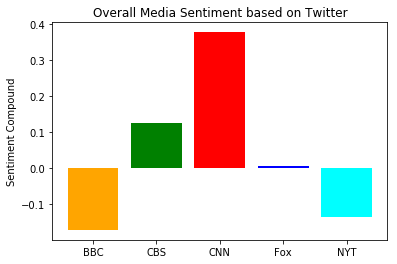

In [32]:
plt.bar(['BBC','CBS','CNN','Fox','NYT'], news_compound_list, color=['orange', 'green', 'red', 'blue', 'cyan'])
plt.title("Overall Media Sentiment based on Twitter")
plt.ylabel('Sentiment Compound')
plt.show()

In [68]:
target_user = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
sentiments_cnn = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments_cnn.append({"CNN_Compound": compound,
                            "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
# Convert sentiments to DataFrame
cnn_sentiments_pd = pd.DataFrame.from_dict(sentiments_cnn)
cnn_sentiments_pd

,CNN_Compound,Tweets Ago
0,0.1477,1
1,0.0000,2
2,-0.8020,3
3,-0.5659,4
4,-0.3818,5
5,0.0000,6
6,0.2244,7
7,0.0000,8
8,0.2500,9
9,0.2732,10


In [69]:
target_user = "@BBC"

# Counter
counter = 1

# Variables for holding sentiments
sentiments_bbc = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments_bbc.append({"BBC_Compound": compound,
                            "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
# Convert sentiments to DataFrame
bbc_sentiments_pd = pd.DataFrame.from_dict(sentiments_bbc)
bbc_sentiments_pd

,BBC_Compound,Tweets Ago
0,0.2603,1
1,0.0000,2
2,0.4574,3
3,0.0000,4
4,0.2960,5
5,0.0000,6
6,0.0000,7
7,0.5267,8
8,0.0000,9
9,0.0000,10


In [70]:
target_user = "@CBS"

# Counter
counter = 1

# Variables for holding sentiments
sentiments_cbs = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments_cbs.append({"CBS_Compound": compound,
                            "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
# Convert sentiments to DataFrame
cbs_sentiments_pd = pd.DataFrame.from_dict(sentiments_cbs)
cbs_sentiments_pd

,CBS_Compound,Tweets Ago
0,0.6239,1
1,0.5859,2
2,0.1139,3
3,0.0000,4
4,0.0000,5
5,0.3382,6
6,0.1867,7
7,0.4199,8
8,0.0000,9
9,0.3595,10


In [71]:
target_user = "@FoxNews"

# Counter
counter = 1

# Variables for holding sentiments
sentiments_fox = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments_fox.append({"FOX_Compound": compound,
                            "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
# Convert sentiments to DataFrame
foxnews_sentiments_pd = pd.DataFrame.from_dict(sentiments_fox)
foxnews_sentiments_pd

,FOX_Compound,Tweets Ago
0,0.0000,1
1,0.3400,2
2,0.6037,3
3,0.0000,4
4,-0.4767,5
5,-0.4767,6
6,0.0000,7
7,-0.6249,8
8,-0.4767,9
9,0.3612,10


In [72]:
target_user = "@nytimes"

# Counter
counter = 1

# Variables for holding sentiments
sentiments_nyt = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, page=x+1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments_nyt.append({"NYT_Compound": compound,
                            "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1
        
# Convert sentiments to DataFrame
nytimes_sentiments_pd = pd.DataFrame.from_dict(sentiments_nyt)
nytimes_sentiments_pd

,NYT_Compound,Tweets Ago
0,-0.4767,1
1,0.3818,2
2,0.6369,3
3,0.0000,4
4,-0.8346,5
5,-0.7845,6
6,0.0000,7
7,0.0000,8
8,0.4404,9
9,0.7650,10


In [91]:
merge_1 = pd.merge(nytimes_sentiments_pd,foxnews_sentiments_pd,on='Tweets Ago')
merge_2 = pd.merge(merge_1,cnn_sentiments_pd,on = 'Tweets Ago')
merge_3 = pd.merge(merge_2,bbc_sentiments_pd,on = 'Tweets Ago')
merged_pd = pd.merge(merge_2,cbs_sentiments_pd,on = 'Tweets Ago')

del merged_pd['Tweets Ago']
merged_pd

,NYT_Compound,FOX_Compound,CNN_Compound,CBS_Compound
0,-0.4767,0.0000,0.1477,0.6239
1,0.3818,0.3400,0.0000,0.5859
2,0.6369,0.6037,-0.8020,0.1139
3,0.0000,0.0000,-0.5659,0.0000
4,-0.8346,-0.4767,-0.3818,0.0000
5,-0.7845,-0.4767,0.0000,0.3382
6,0.0000,0.0000,0.2244,0.1867
7,0.0000,-0.6249,0.0000,0.4199
8,0.4404,-0.4767,0.2500,0.0000
9,0.7650,0.3612,0.2732,0.3595


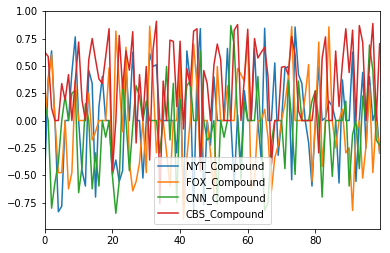

In [95]:
merged_pd.plot()
plt.show()